##### `Importing the modules`

In [37]:
# necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



##### `Loading the data`

In [38]:
# loading data into dataframe
df = pd.read_csv('../redWineQuality/datasets/winequality-red.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### `EDA(Exploratory Data Analysis)`

- Determine rows and columns

In [39]:
# Determine number of records (rows) and features (columns).
df.shape

(1599, 12)

- Data describe

In [40]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Checking null value

In [41]:
# To detect the missing values in the cells
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Checking duplicated value

In [42]:
df.duplicated().sum()

240

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.duplicated().sum()

0

In [45]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

##### `Data Correlation`

In [46]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


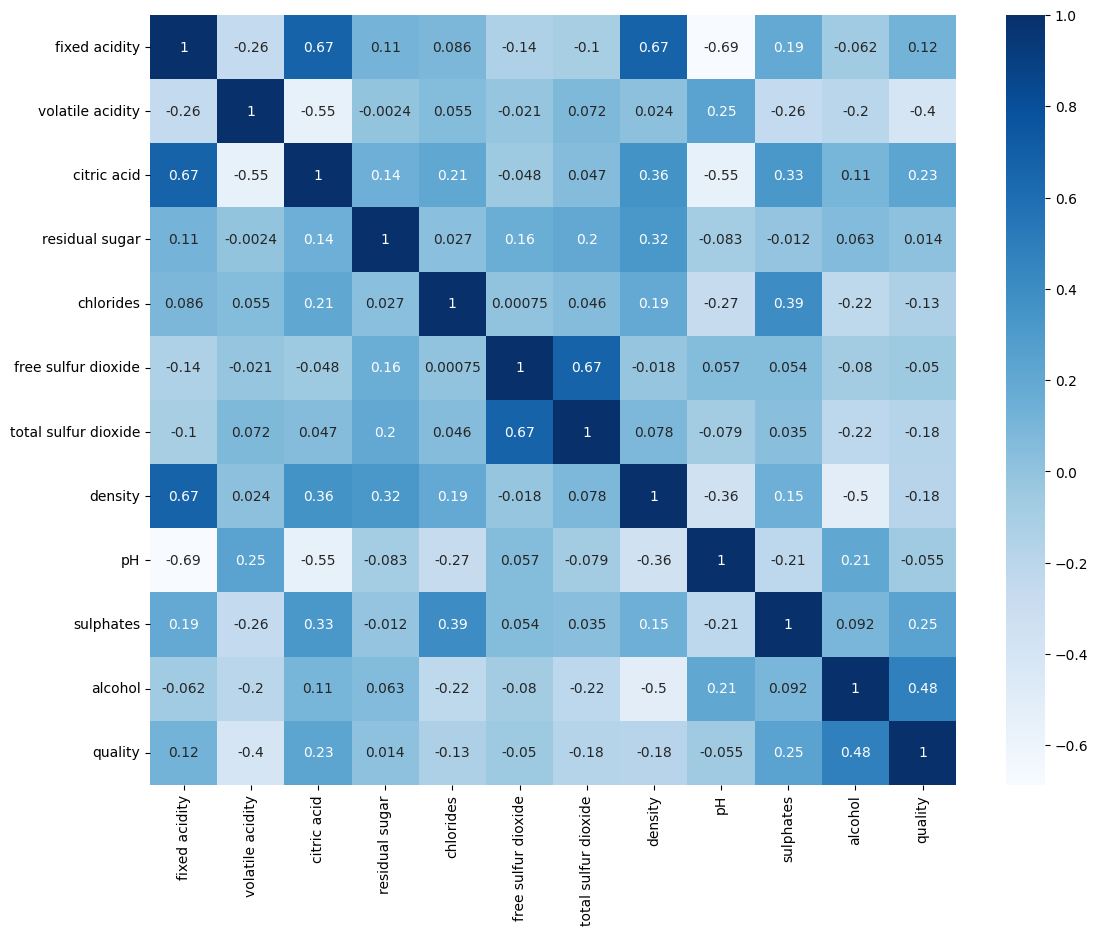

In [47]:
# heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

##### `Preprocessing Data`

- Feature Scaling

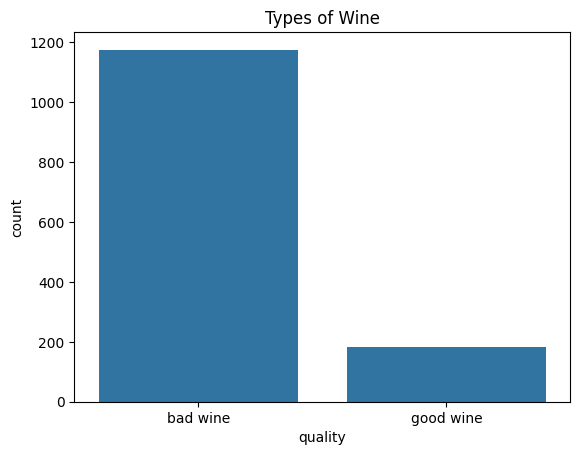

In [48]:
#feature Scaling
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


sns.countplot(data = df, x = 'quality')
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

- Resampling Datasets


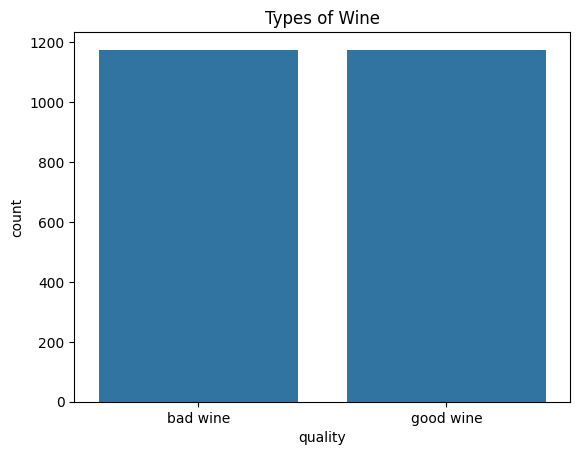

In [49]:
#resampling Datasets
X = df[['fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'density']]
y = df.quality
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)
sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

##### `splitting the data`

In [50]:
# splitting the dependent and independent features.
X = df.drop('quality', axis = 1)
y = df['quality']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# check the shape of the splited sets
X_train.shape, X_test.shape

((1087, 11), (272, 11))

##### `Evaluation of the model`

In [51]:
#Evaluation of the model
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    # Scaling Process
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model building process
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    
    print("Evaluation of the Model")
    print("\n")
    print("Classification report of the Model: \n", classification_report(y_test, mod_pred))
    print("\n")
    print("Prediction of the Model: \n",mod_pred)
    print("\n")
    print("Confusion Matrix of the Model: \n ",confusion_matrix(y_test, mod_pred))
    print("\n")
    print("Heatmap: \n", sns.heatmap(confusion_matrix(y_test, mod_pred),cmap = "Blues",annot = True, ))
    print("\n")
    print("Accuracy score of the Model: \n", accuracy_score(y_test, mod_pred))
    print("\n")

    return mod

##### `Logistic Regression`


Evaluation of the Model


Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       238
           1       0.62      0.38      0.47        34

    accuracy                           0.89       272
   macro avg       0.77      0.67      0.71       272
weighted avg       0.88      0.89      0.88       272



Prediction of the Model: 
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Confusion Matrix of the M

LogisticRegression()

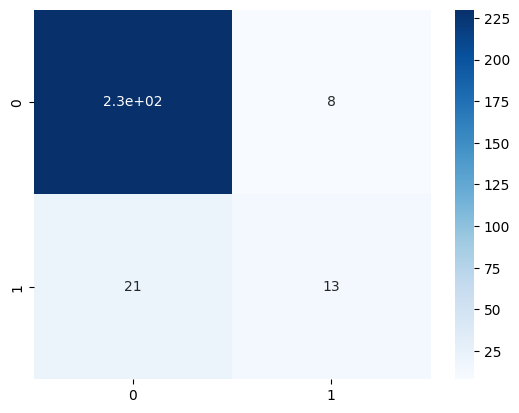

In [52]:
lr = LogisticRegression()
model_evaluation(lr,X_train,y_train, X_test, y_test)

##### `Random Forest`

Evaluation of the Model


Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       238
           1       0.76      0.38      0.51        34

    accuracy                           0.91       272
   macro avg       0.84      0.68      0.73       272
weighted avg       0.90      0.91      0.89       272



Prediction of the Model: 
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]


Confusion Matrix of the M

RandomForestClassifier()

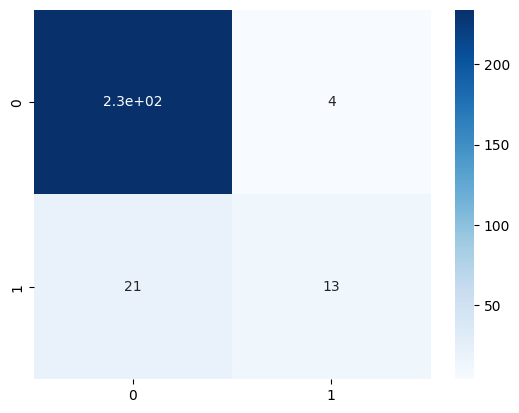

In [53]:
rfc = RandomForestClassifier()
model_evaluation(rfc,X_train,y_train, X_test, y_test)